<a href="https://colab.research.google.com/github/PedroHGMS/rna_trabalho_final/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
import math
import time
import csv
from tqdm.notebook import tqdm
from scipy.stats import multivariate_normal
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import clear_output

In [ ]:
import tensorflow as tf
from tensorflow import keras

((100, 1), (100, 1))

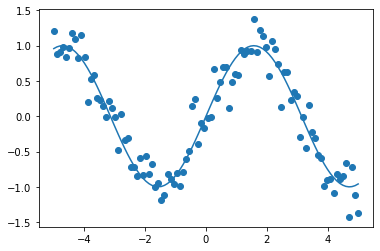

In [ ]:
N = 100
X = np.linspace(-5,5,N).reshape(-1,1)
Y = np.sin(X).reshape(-1, 1) + np.random.normal(scale=0.2, size=100).reshape(-1,1)

plt.plot(X,np.sin(X))
plt.scatter(X,Y)
X.shape, Y.shape

((20, 1), (20, 1))

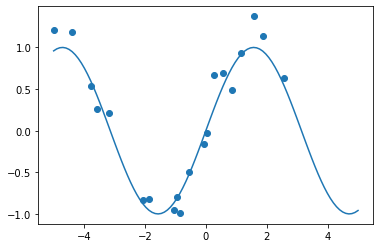

In [ ]:
permutations = np.random.permutation(X.shape[0])

slice_size = 20
X_slice = X[permutations[0:slice_size]]
Y_slice = Y[permutations[0:slice_size]]

plt.plot(X,np.sin(X))
plt.scatter(X_slice,Y_slice)
X_slice.shape, Y_slice.shape

In [ ]:
# Treina vários modelos
num_it = 200
num_modelos = 10
models = []
histories = []

for _ in tqdm(range(num_modelos)):
  model = keras.Sequential([
      keras.layers.Input(shape=(1)),
      keras.layers.Dense(30, activation='tanh'),
      keras.layers.Dense(1, activation='linear')
  ])

  model.compile(optimizer='sgd',
                loss='mse',
                metrics=['mse'])

  history = model.fit(X, Y, epochs=int(num_it), validation_split=0.33, verbose=0)

  models.append(model)
  histories.append(history)

# y_hat = model.predict(X)
# plt.plot(X,y_hat)
# plt.scatter(X,Y)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# Avalia os modelos
y_hat = np.zeros((num_modelos, *(Y.shape)))
for i in tqdm(range(num_modelos)):
  y_hat[i] = models[i].predict(X)

  0%|          | 0/10 [00:00<?, ?it/s]

(10, 100, 1)

  0%|          | 0/10 [00:00<?, ?it/s]

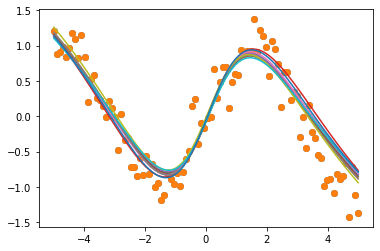

In [ ]:
# Plota resultados médios
y_hat_mean = y_hat.mean(axis=(0,2))
plt.plot(X,y_hat_mean)
plt.scatter(X,Y)

# plotar todos modelos em um grid
for i in tqdm(range(num_modelos)):
  plt.plot(X,y_hat[i])
  plt.scatter(X,Y)
  plt.show()

Epoch 1/100
3/3 [==============================] - 0s 65ms/step - loss: 0.4560 - mse: 0.4560 - val_loss: 0.6473 - val_mse: 0.6473
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.4514 - mse: 0.4514 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.6586 - val_mse: 0.6586
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.4539 - mse: 0.4539 - val_loss: 0.6524 - val_mse: 0.6524
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.4521 - mse: 0.4521 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.4486 - mse: 0.4486 - val_loss: 0.6461 - val_mse: 0.6461
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.4466 - mse: 0.4466 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.4458 - mse: 0.44

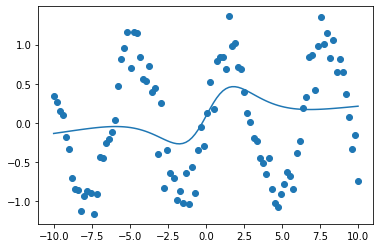

In [ ]:
num_it = 100
history = model.fit(X, Y, epochs=int(num_it), validation_split=0.33)

y_hat = model.predict(X)
plt.plot(X,y_hat)
plt.scatter(X,Y)
# plt.plot(X,np.sin(X))

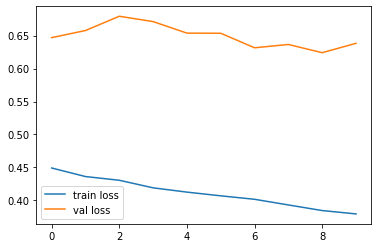

In [ ]:
plt.plot(np.array(history.history['loss']).reshape(-1,10).mean(axis=1).reshape(-1,1),label='train loss')
plt.plot(np.array(history.history['val_loss']).reshape(-1,10).mean(axis=1).reshape(-1,1),label='val loss')
plt.legend()